In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('smoking.csv')
df = df.drop(columns=['ID','oral'])
df.sample(5)

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
46029,M,40,160,55,67.1,1.5,0.8,1.0,1.0,126.0,...,157.0,15.2,1.0,1.1,19.0,16.0,24.0,0,N,1
26998,M,55,165,70,89.0,1.2,1.2,1.0,1.0,106.0,...,109.0,15.5,1.0,0.8,30.0,26.0,27.0,0,Y,0
46713,F,45,150,60,82.0,1.0,1.0,1.0,1.0,110.0,...,151.0,11.8,1.0,0.9,18.0,15.0,15.0,0,Y,0
8964,F,45,160,55,74.0,0.7,0.7,1.0,1.0,99.0,...,116.0,9.9,1.0,0.8,22.0,9.0,13.0,1,Y,0
22740,F,60,160,60,83.0,0.9,0.9,1.0,1.0,125.0,...,119.0,12.8,1.0,0.6,29.0,23.0,10.0,0,Y,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

In [4]:
df.isnull().sum()

gender                 0
age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
tartar                 0
smoking                0
dtype: int64

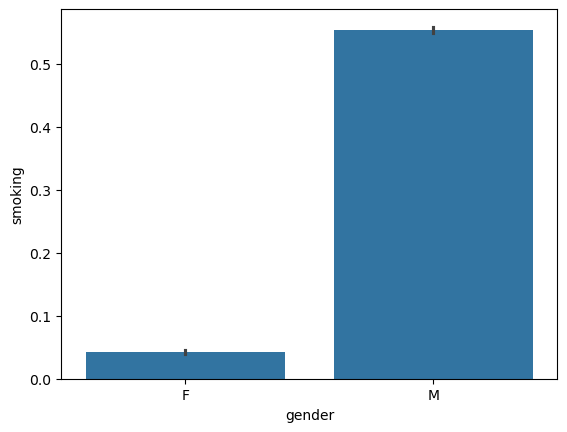

In [5]:
sns.barplot(x='gender', y='smoking', data=df)
plt.show()

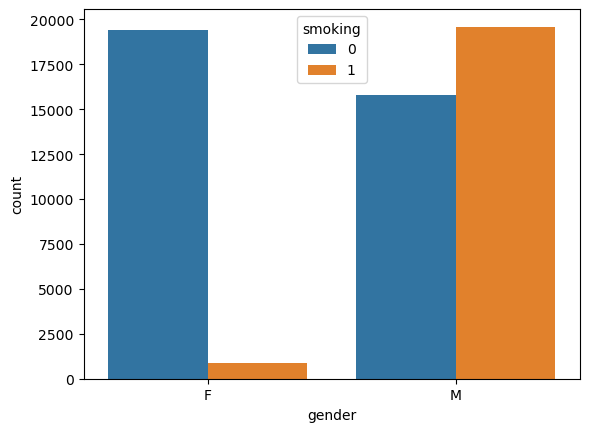

In [ ]:
sns.countplot(x=df['gender'], hue=df['smoking'])
plt.show()

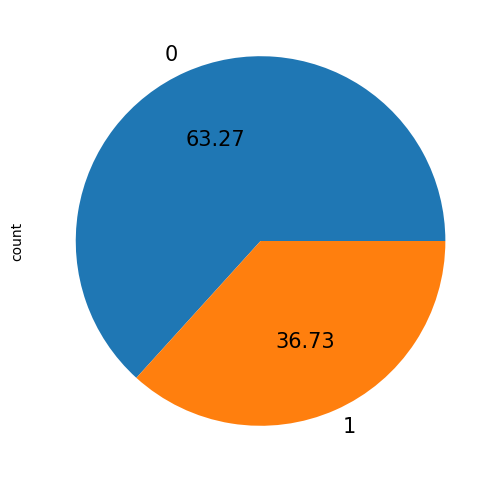

In [12]:
plt.figure(figsize=(10,6))
df['smoking'].value_counts().plot.pie(autopct='%0.2f',textprops={'fontsize': 15})
plt.show()

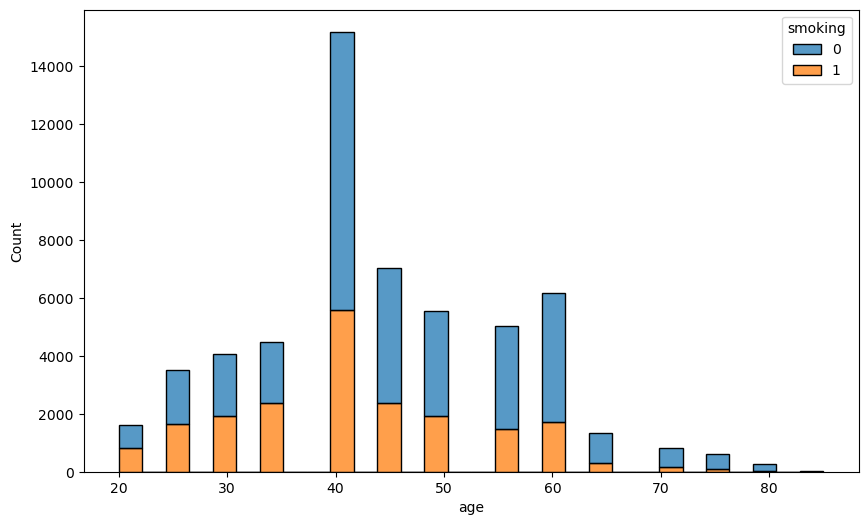

In [22]:
plt.figure(figsize=(10,6))
sns.histplot(x=df['age'], bins=30, hue=df['smoking'],multiple='stack')
plt.show()

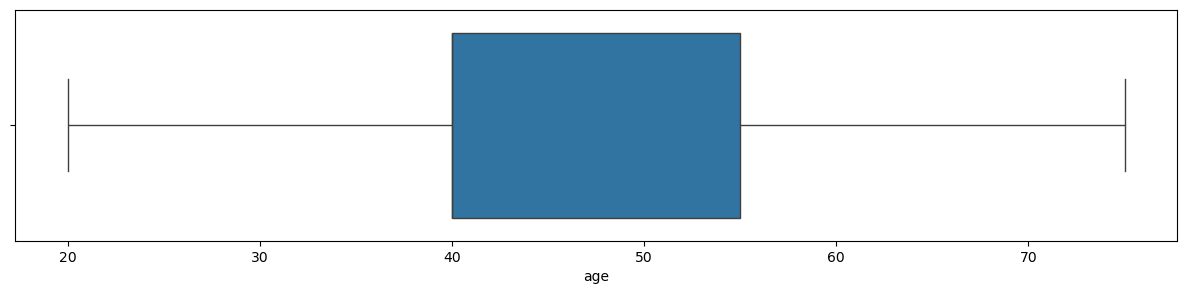

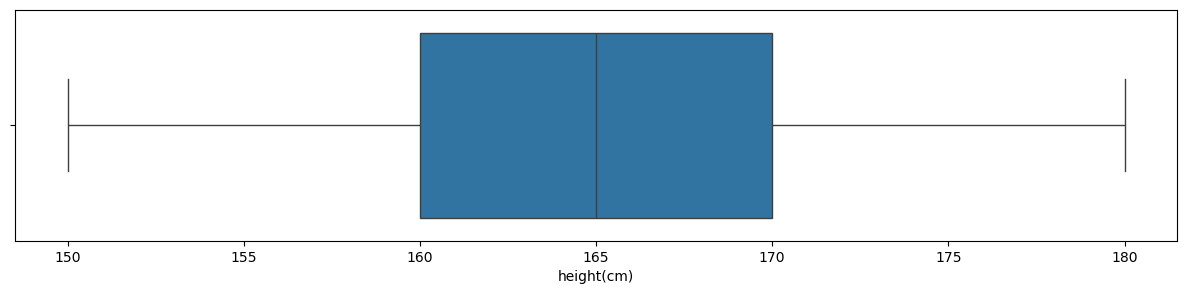

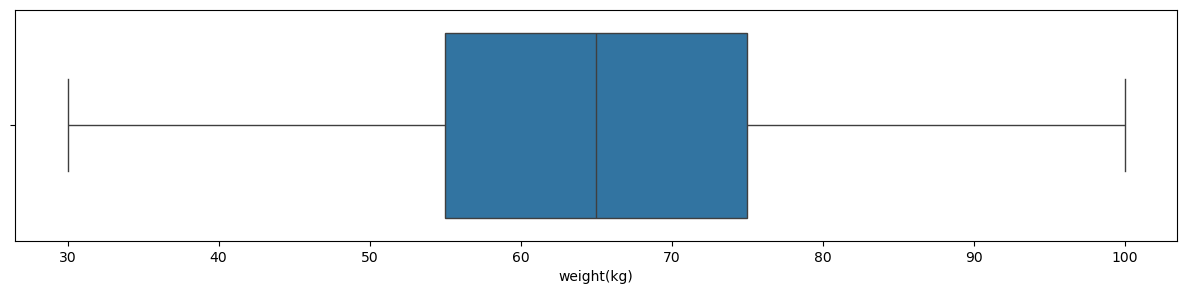

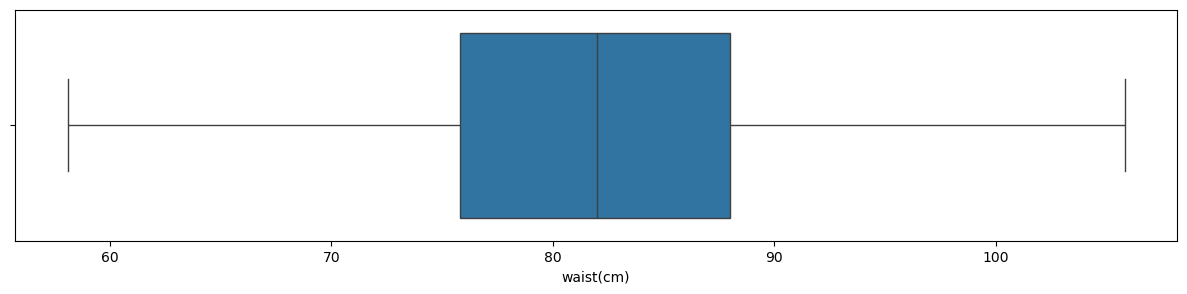

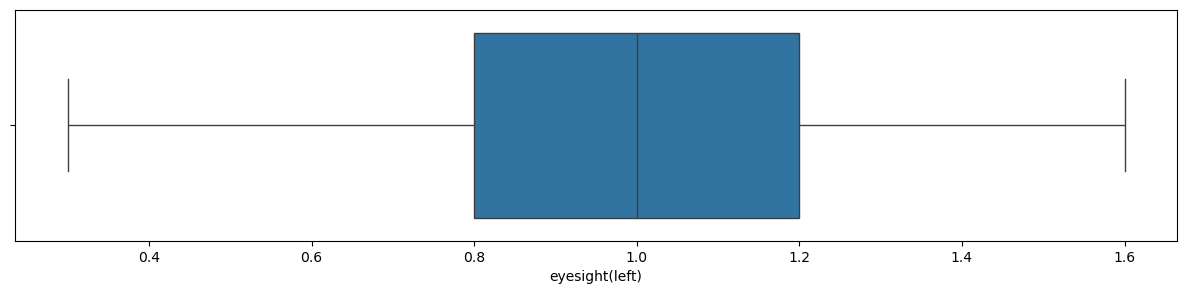

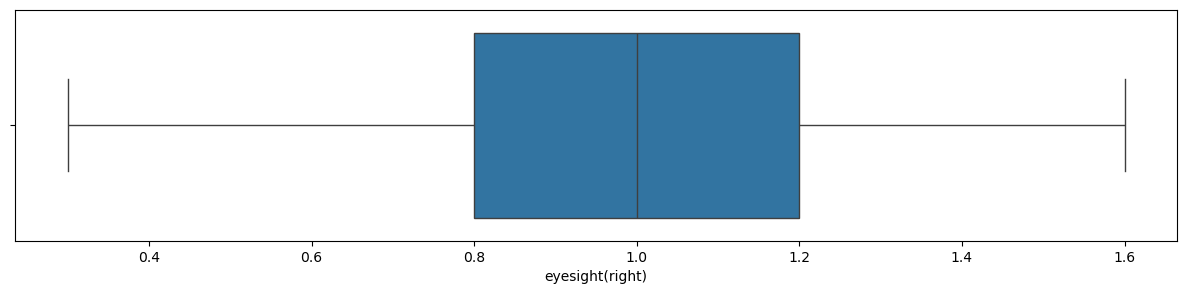

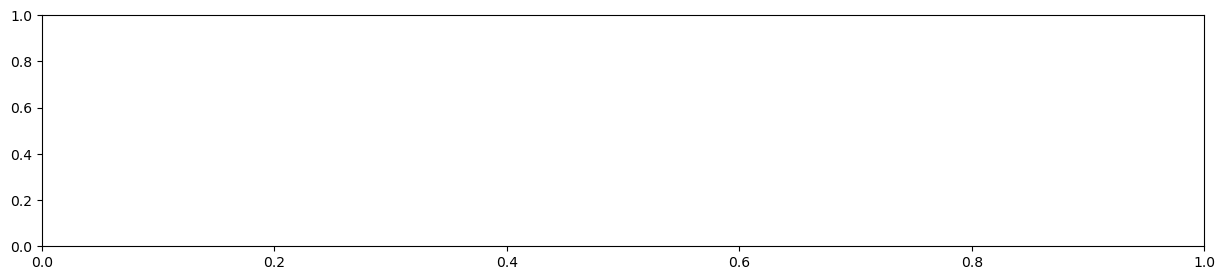

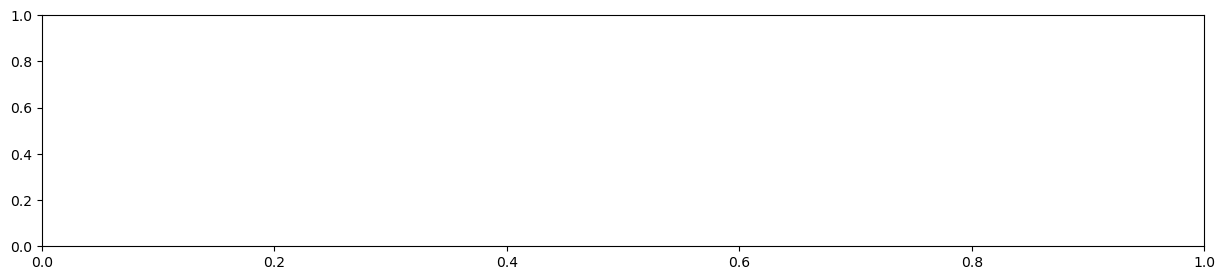

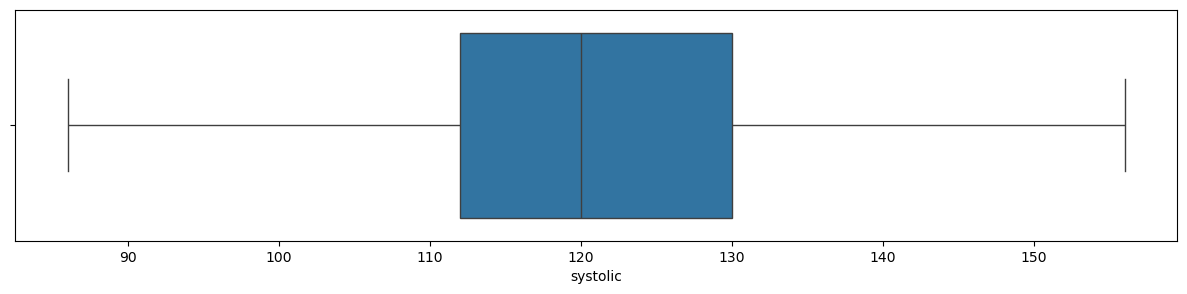

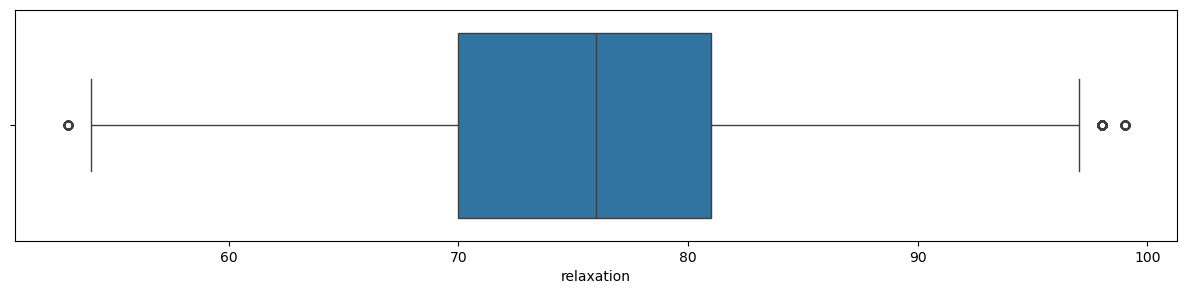

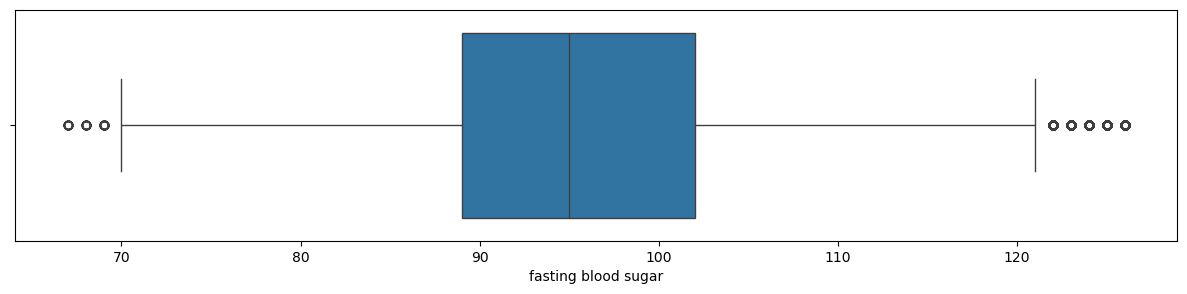

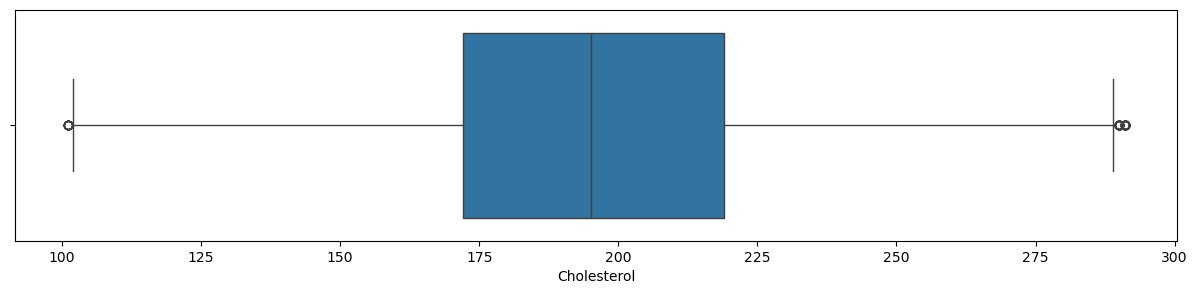

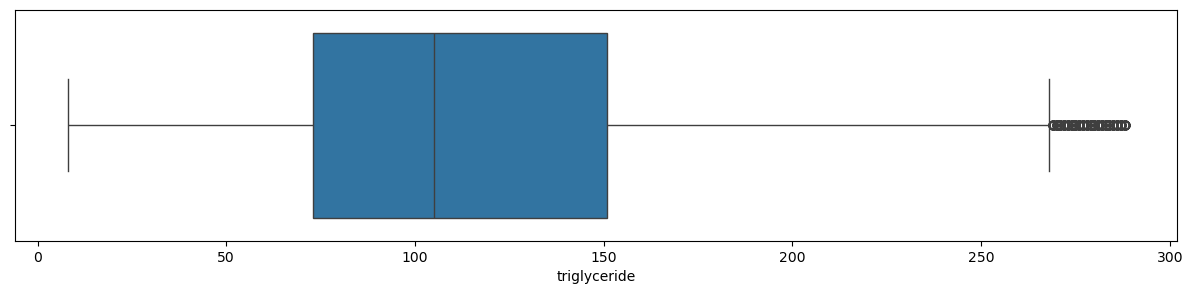

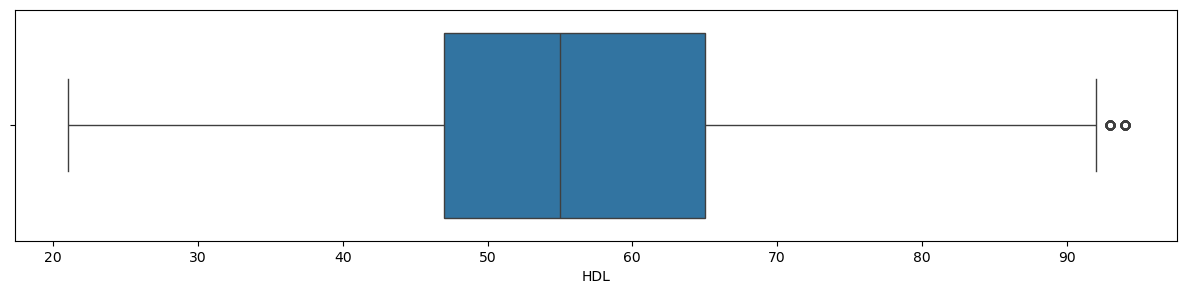

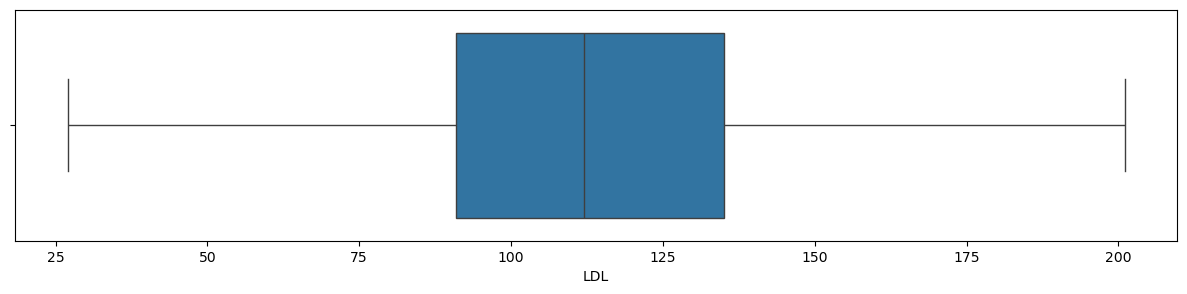

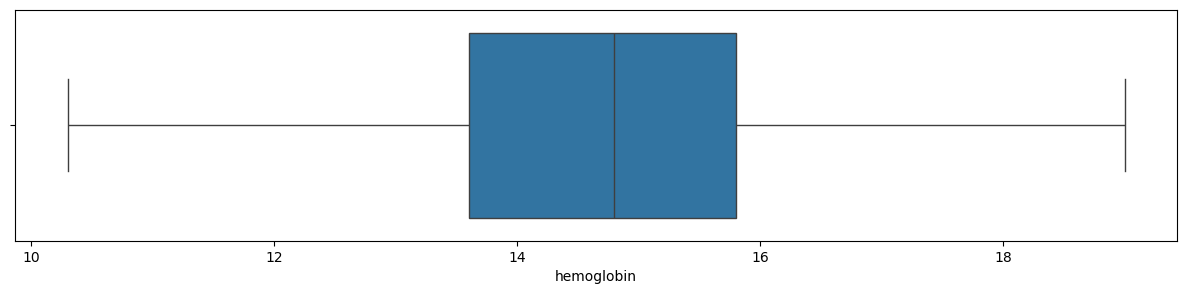

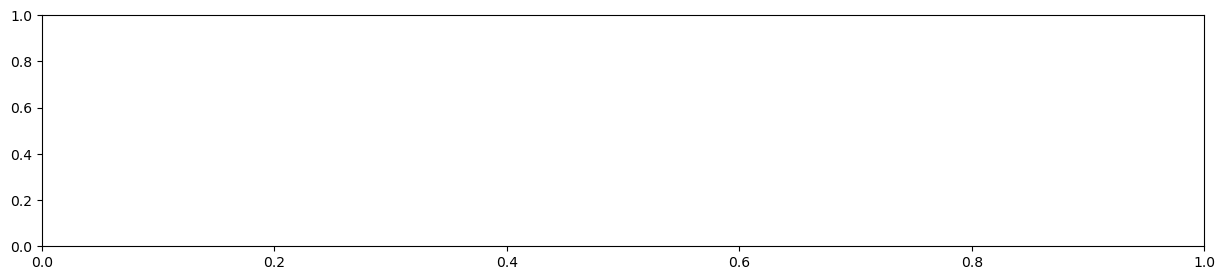

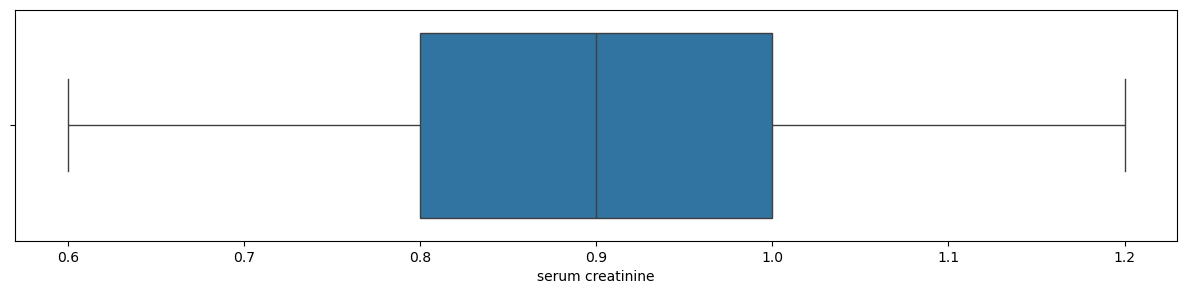

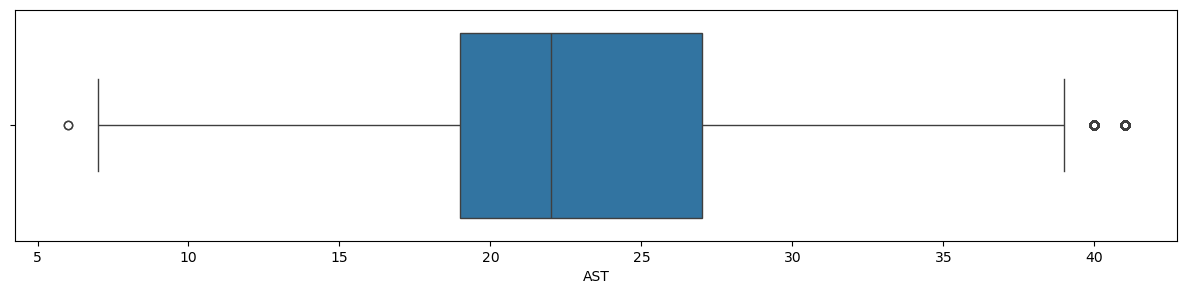

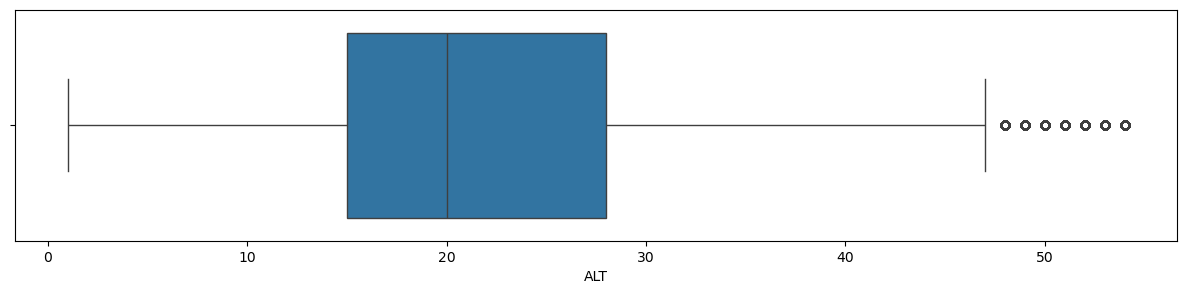

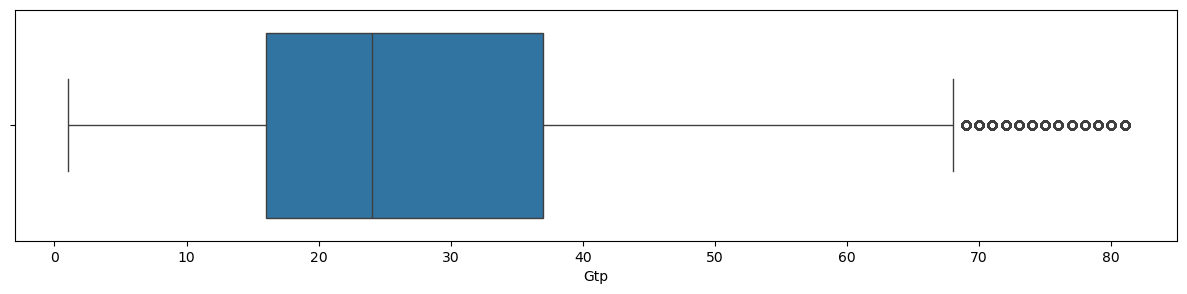

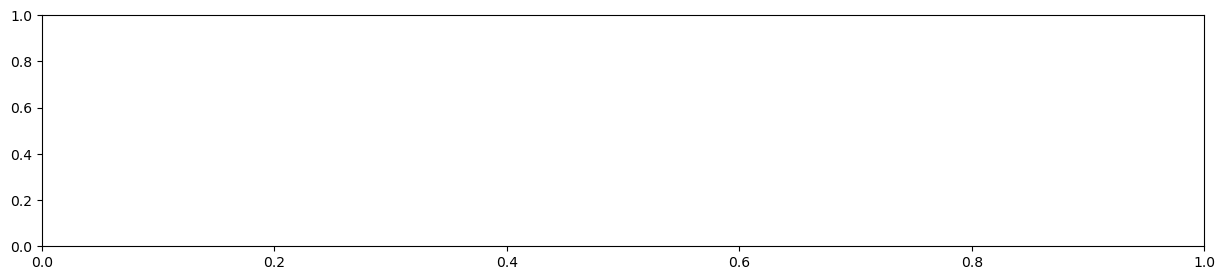

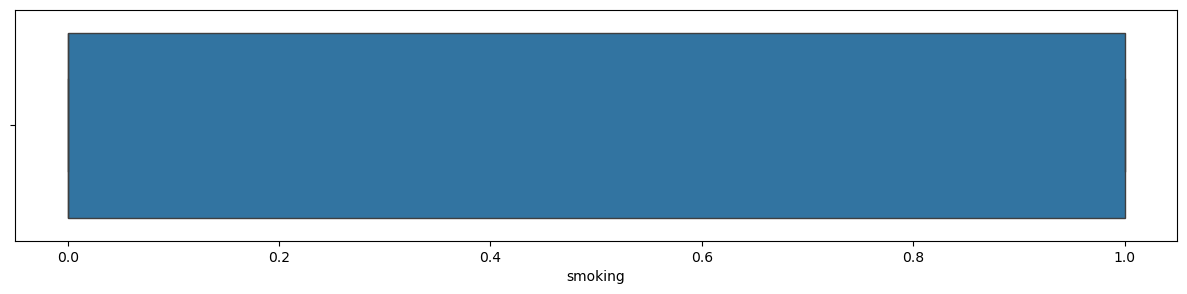

In [27]:
for i in df.columns:
    if df[i].dtype != 'object':
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        dfp = df[(df[i] > lower) & (df[i] < upper)]
        plt.figure(figsize=(15,3))
        sns.boxplot(x=dfp[i])
        plt.show()

In [28]:
#Data Preprocessing
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['tartar'] = le.fit_transform(df['tartar'])
df['dental caries'] = le.fit_transform(df['dental caries'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  int32  
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

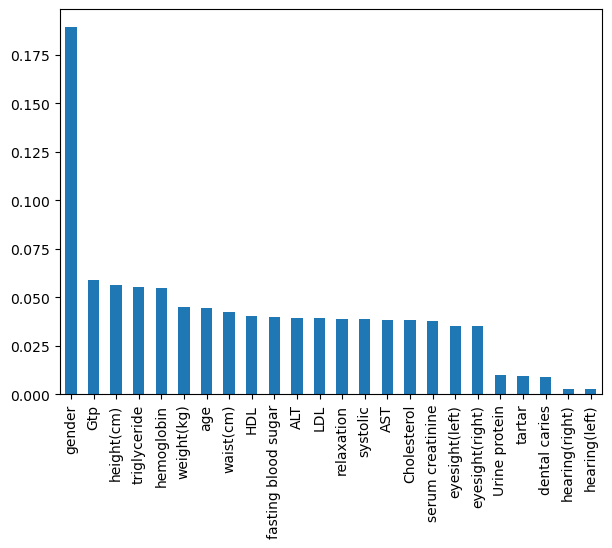

In [34]:
#Feature Selection
x = df.drop(columns=['smoking'])
y = df['smoking']
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
df1 = pd.Series(model.feature_importances_, index=x.columns)
plt.figure(figsize=(7,5))
df1.nlargest(24,).plot(kind='bar')
plt.show()

In [35]:
#Train Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)


In [ ]:
#Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(f'Accuracy Score: {accuracy_score(y_test,y_pred)*100:.2f}%')
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))


Accuracy Score:83.24%
Confusion Matrix:
 [[6037 1039]
 [ 828 3235]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.85      0.87      7076
           1       0.76      0.80      0.78      4063

    accuracy                           0.83     11139
   macro avg       0.82      0.82      0.82     11139
weighted avg       0.83      0.83      0.83     11139



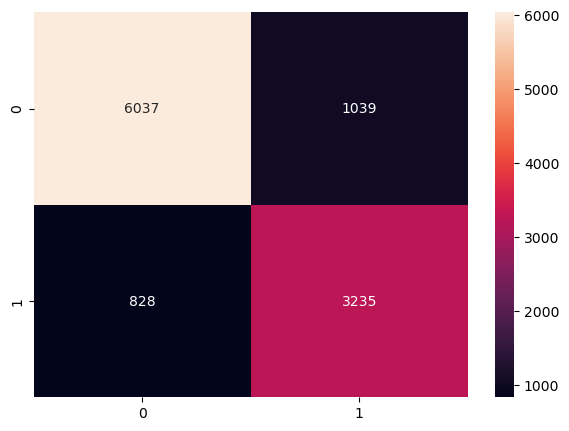

In [38]:
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True, fmt='d')
plt.show()